In [ ]:
import pandas as pd
import numpy as np
!pip install gdown --quiet
import os
import gdown
import zipfile
file_id = '1JETU_HqENMmdjzDJNPDGWiR-ZceDhBBG'
output= 'diabetes_dataset_with_notes.zip'
folder= 'data'
nombre_archivo= 'diabetes_dataset_with_notes.csv'
try:
    print("Descargando archivo zip desde Google Drive...")
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# Extraer el contenido
    print(f"Extrayendo archivos a {folder}...")
    os.makedirs(folder, exist_ok=True)
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall(folder)

    # Cargar el CSV
    csv_path = os.path.join(folder, nombre_archivo)
    print(f"Cargando dataset desde {csv_path}...")
    df = pd.read_csv(csv_path)

    print("¡Dataset cargado exitosamente!")
    print(df.head())

except Exception as e:
    print(f"Error: {str(e)}")
    raise

In [ ]:
#EDA
diabetes_df.head()


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [ ]:
diabetes_df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
#Aquí ya podemos observar que podemos simplificar las diferentes columnas que incluyen 'race'

diabetes_df.info()
print('-'*30)
diabetes_df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes', 'clinical_notes'],
      dtype='object')

In [ ]:
#Obtener el numero de puntos de datos faltantes por columna
missing_values_count = diabetes_df.isnull().sum()
#imprimir sabiendo que tenemos 16 columnas
missing_values_count[0:16]


,0
year,0
gender,0
age,0
location,0
race:AfricanAmerican,0
race:Asian,0
race:Caucasian,0
race:Hispanic,0
race:Other,0
hypertension,0


In [ ]:
#no hay valores NaN por lo que no es necesairo sacar el valor de los nulos totales ni el porcentaje de datos perdidos
#no es necesario realizar intervenciones para llenar datos
#simplificar columnas con el prefijo 'race:'

race_columns = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']

# identifica los valores con 1 en cada columna y asigna el str de la columna que le correspone a una serie y reemplaza el prefijo de cada valor
#esto es para respetar el lugar que tenían las columnas race

race_series= diabetes_df[race_columns].idxmax(axis=1).str.replace('race:', '')
diabetes_df.insert(3, 'race', race_series) #insertamos la columna nueva con los valores de la serie en la posición 3, despues de location

#eliminar las columnas originales
diabetes_df.drop(columns=race_columns, inplace=True)

diabetes_df.head() #comprobamos



,year,gender,age,race,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Other,Alabama,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Asian,Alabama,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Other,Alabama,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Caucasian,Alabama,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,AfricanAmerican,Alabama,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


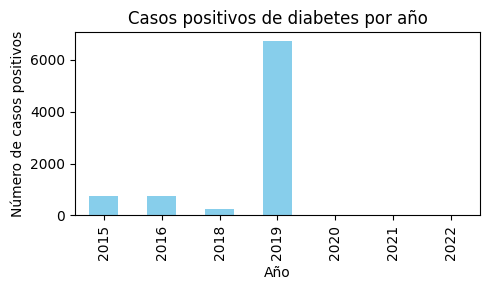

In [ ]:
#Gráficar los casos positivos de diabetes por año
import matplotlib.pyplot as plt

# Filtrar solo casos positivos de diabetes
positivos = diabetes_df[diabetes_df['diabetes'] == 1]

# Agrupar por año y contar
suma_anual = positivos['year'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(5,3))
suma_anual.plot(kind='bar', color='skyblue')
plt.title('Casos positivos de diabetes por año')
plt.xlabel('Año')
plt.ylabel('Número de casos positivos')
plt.tight_layout() #evita la saturación de información
plt.show()


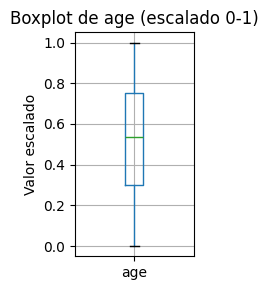

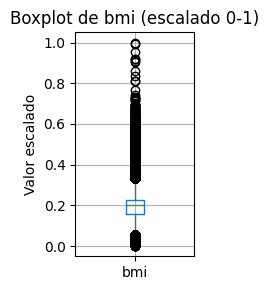

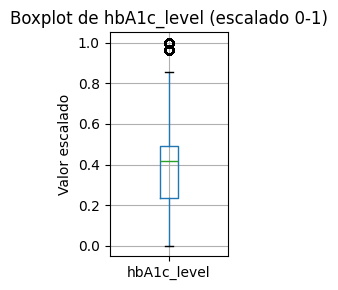

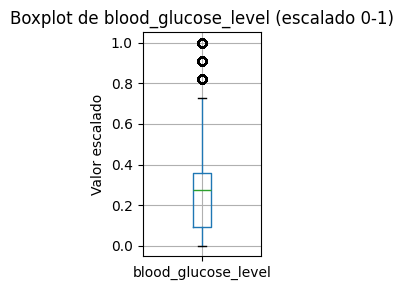

In [ ]:
#boxplots de columnas numericas
from sklearn.preprocessing import MinMaxScaler

# Eliminar 'year' y resetear índice para evitar incluirlo en el análisis
df = diabetes_df.reset_index(drop=True)
df = df.drop(columns=['year'], errors='ignore')

# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Filtrar columnas con valores máximos mayores a 1
filtered_cols = [col for col in num_cols if df[col].max() > 1]

# Escalar datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[filtered_cols])
scaled_df = pd.DataFrame(scaled_data, columns=filtered_cols)

# Crear un boxplot por columna
for col in filtered_cols:
    plt.figure(figsize=(2, 3))
    scaled_df.boxplot(column=col)
    plt.title(f'Boxplot de {col} (escalado 0-1)')
    plt.ylabel('Valor escalado')
    plt.tight_layout()
    plt.show()


In [ ]:
#hay que imprimir los valores unicos de las columnas tipo object:
object_columns = diabetes_df.select_dtypes(include=['object']).columns
for col in object_columns:
    print('Columna:', {col})
    unique_values= diabetes_df[col].unique()
    #organizar alfabeticamente
    unique_values.sort()
    print(unique_values)
    print("-" * 30)


Columna: {'gender'}
['Female' 'Male' 'Other']
------------------------------
Columna: {'race'}
['AfricanAmerican' 'Asian' 'Caucasian' 'Hispanic' 'Other']
------------------------------
Columna: {'location'}
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'United States'
 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington' 'West Virginia'
 'Wisconsin' 'Wyoming']
------------------------------
Columna: {'smoking_history'}
['No Info' 'current' 'ever' 'former' 'never' 'not current']
-------------

In [ ]:
'''
No encontramos inconsistencias como simbolos, espacios y diferencias de mayúsculas
'''
import os
#aquí termina EDA
# Guardar datos limpios (usando ruta relativa)
output_path = "diabetes_cleaned.csv"
diabetes_df.to_csv(output_path, index=False)
print(f"Datos limpios guardados en: {output_path}")


 ¡¡¡ Dataset limpio guardado en: new_data/diabetes_cleaned.csv!!!
